# Question 8:
Using the data from Question 5, write code the analyze the data and answer the following questions 

Insights to be drawn:
* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
* Get all the episode names, whose average rating is more than 8 for every season
* Get all the episode names that aired before May 2019
* Get the episode name from each season with the highest and lowest rating
* Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

# Data Loading

In [2]:
file = 'Westworld_Episodes.csv'
df = pd.read_csv(file)
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,_links.self.href,_links.show.href
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,<p>A woman named Dolores is a free spirit in t...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,<p>Bernard suspects that someone is sabotaging...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,<p>Bernard continues to investigate Dolores' s...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,<p>While Dolores joins William and Logan on th...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,<p>Dolores takes the first step on her path of...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


In [31]:
types = df.dtypes; nulls = df.isna().sum(); null_percent = df.isna().sum()/len(df)*100
column_summary = pd.concat([types,nulls,null_percent], axis = 1)
column_summary.columns = ['data_type', 'null_count', 'null_percent']
print(column_summary)

                 data_type  null_count  null_percent
id                   int64           0           0.0
url                 object           0           0.0
name                object           0           0.0
season               int64           0           0.0
number               int64           0           0.0
type                object           0           0.0
airdate             object           0           0.0
airtime             object           0           0.0
airstamp            object           0           0.0
runtime              int64           0           0.0
summary             object           0           0.0
rating.average     float64           0           0.0
image.medium        object           0           0.0
image.original      object           0           0.0
_links.self.href    object           0           0.0
_links.show.href    object           0           0.0


In [36]:
# Converting dtype of airdate to datetime
df['airdate'] = pd.to_datetime(df['airdate'])

# Data Analysis:

## Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

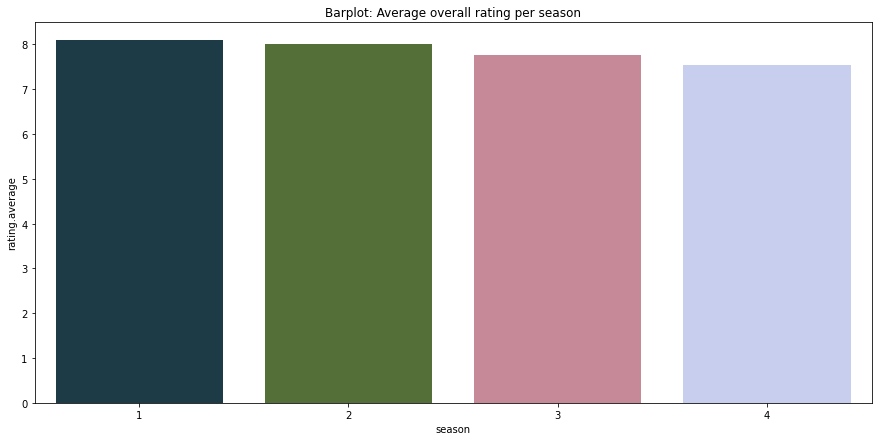

In [24]:
plt.figure(figsize = (15,7))
plt.title('Barplot: Average overall rating per season')
mean_rating_per_season = df.groupby(by='season').mean()['rating.average']
sns.barplot(y = mean_rating_per_season, x = mean_rating_per_season.index, palette = 'cubehelix')
plt.show()

## Get all the episode names, whose average rating is more than 8 for every season

In [35]:
df[df['rating.average'] > 8 ][['name', 'rating.average']]

,name,rating.average
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


## Get all the episode names that aired before May 2019

In [44]:
df[(df.airdate<'2019-05')][['name','airdate']]

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


## Get the episode name from each season with the highest and lowest rating

In [61]:
highest_ratings = df.groupby('season')['name','rating.average'].max() # grouping by ratings average to get highest rated season and season name
highest_ratings.columns = ['Highest rated episode name', 'Highest rated episode rating'] # renameing column identifiers to more meaninful names

lowest_ratings = df.groupby('season')['name','rating.average'].min()  # grouping by ratings average to get lowest rated season and season name
lowest_ratings.columns = ['Lowest rated episode name', 'Lowest rated episode rating'] # renameing column identifiers to more meaninful names

pd.concat([highest_ratings, lowest_ratings], axis = 1)

,Highest rated episode name,Highest rated episode rating,Lowest rated episode name,Lowest rated episode rating
season,,,,
1,Trompe L'Oeil,8.7,Chestnut,7.6
2,Virtù e Fortuna,8.7,Akane No Mai,7.6
3,The Winter Line,8.0,Crisis Theory,7.5
4,Zhuangzi,7.8,Années Folles,7.1


## Get the summary for the most popular ( ratings ) episode in every season

In [67]:
best_episode_summary = df.groupby('season')['name','rating.average', 'summary'].max() # grouping by ratings average to get highest rated season, name and summary
best_episode_summary.columns = ['Episode name', 'Rating', 'Summary'] # renameing column identifiers to more meaninful names
best_episode_summary

,Episode name,Rating,Summary
season,,,
1,Trompe L'Oeil,8.7,<p>While William and Dolores travel to the unc...
2,Virtù e Fortuna,8.7,<p>William pays his recuperating father-in-law...
3,The Winter Line,8.0,<p>Time to face the music. Dolores' true inten...
4,Zhuangzi,7.8,<p>You want to have a drink at a time like thi...
